<a href="https://colab.research.google.com/github/jananilakshminarayanan/DA-DS-projects/blob/main/LoanPrediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Loan Prediction Machine Learning Algorithm:

### **Problem Statement:**

The goal of this project is to build a machine learning model to predict whether a bank loan applicant will be approved for a loan. The dataset includes features such as applicant income, loan amount, credit history, and others. Accurate predictions can assist banks in making data-driven lending decisions.

### **Solution Approach:**

Since the target(dependent variable) is a discrete categorical variable we are going to explore classification algorithms for this problem solution. Also since its a financial i.e bank loan data it is understood that accuracy will not be effective evaluation metric, as spotting bad loans is way more important than spotting good loans. So we will explore more evaluation metrics like precision, recall or F1-score and decide on best fit model

**Step 1:** Load necessary libraries

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:** Load the dataset. **note:** data is present in local machine which is uploaded to colab session manually

In [ ]:
# load train and test datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

**Step 3:** Perform Exploratory Data Analysis

In [ ]:
# EDA
train.head(10)

,customer_id,year_of_loan,income_group,annual_income,loan_dsbursement_amount,loan_time_period,loan_application_category,loan_type,category_of_interest,interest_rate,loan_grade,anonymous_X1,emi_amount,living_area,loan_status
0,CSID_543704,2016,Low,47836.70,1200.0,36 months,COLLATERAL LOAN,other,High,15.47,D,15.26,41.95,urban,Good Loan
1,CSID_785937,2019,Low,32656.53,9950.0,60 months,INDIVIDUAL,debt_consolidation,Low,13.30,C,24.36,201.13,urban,Bad Loan
2,CSID_854712,2019,Low,103760.56,20000.0,36 months,COLLATERAL LOAN,debt_consolidation,High,18.26,E,15.88,853.55,semi urban,Good Loan
3,CSID_604825,2017,Low,68338.13,6000.0,60 months,INDIVIDUAL,debt_consolidation,Low,10.26,B,17.93,116.15,township,Good Loan
4,CSID_715030,2017,Medium,166065.52,3500.0,48 months,COLLATERAL LOAN,home_improvement,Low,5.79,A,6.16,79.61,urban,Good Loan
5,CSID_876792,2017,Low,84115.25,20000.0,48 months,UNKNOWN,debt_consolidation,Low,8.79,A,4.09,476.30,semi urban,Good Loan
6,CSID_978606,2018,Low,70579.85,5500.0,48 months,UNKNOWN,debt_consolidation,High,18.68,E,16.73,176.99,urban,Good Loan
7,CSID_1024144,2019,Low,37129.27,3000.0,48 months,COLLATERAL LOAN,other,Low,12.34,B,15.01,75.19,semi urban,Good Loan
8,CSID_579431,2016,Low,76099.76,10000.0,48 months,UNKNOWN,debt_consolidation,Low,10.98,B,14.91,244.66,township,Good Loan
9,CSID_746729,2019,Low,37565.14,10625.0,24 months,JOINT,credit_card,High,21.68,F,20.13,724.00,rural,Good Loan


In [ ]:
# Understand shape of data i.e no of rows and columns
train.shape

(24450, 15)

In [ ]:
# see detailed information relating to each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24450 entries, 0 to 24449
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                24450 non-null  object 
 1   year_of_loan               24450 non-null  int64  
 2   income_group               24450 non-null  object 
 3   annual_income              23597 non-null  float64
 4   loan_dsbursement_amount    23594 non-null  float64
 5   loan_time_period           24450 non-null  object 
 6   loan_application_category  24450 non-null  object 
 7   loan_type                  23246 non-null  object 
 8   category_of_interest       24450 non-null  object 
 9   interest_rate              24406 non-null  float64
 10  loan_grade                 24402 non-null  object 
 11  anonymous_X1               24450 non-null  float64
 12  emi_amount                 24450 non-null  float64
 13  living_area                24450 non-null  obj

In [ ]:
# get to know the descriptive statistics parameters
train.describe()

,year_of_loan,annual_income,loan_dsbursement_amount,interest_rate,anonymous_X1,emi_amount
count,24450.000000,2.359700e+04,23594.000000,24406.000000,24450.000000,24450.000000
mean,2017.725808,7.908455e+04,11639.551369,12.195082,13.675022,387.776933
std,0.929689,6.443436e+04,7824.479174,4.017898,6.684628,331.542776
min,2016.000000,4.289100e+03,1000.000000,5.270000,-0.050000,3.720000
25%,2017.000000,4.744207e+04,5600.000000,8.790000,8.520000,156.590000
50%,2018.000000,6.720527e+04,10000.000000,11.910000,13.730000,285.780000
75%,2018.000000,9.509541e+04,15250.000000,15.140000,18.960000,511.580000
max,2019.000000,4.659686e+06,35000.000000,24.780000,29.990000,2453.620000


In [ ]:
# Analyse and find whether there are any missing values
train.isnull().sum()

,0
customer_id,0
year_of_loan,0
income_group,0
annual_income,853
loan_dsbursement_amount,856
loan_time_period,0
loan_application_category,0
loan_type,1204
category_of_interest,0
interest_rate,44


### **Step 4:** Data Preprocessing

Since its apparent there are missing values, decide on relevant statistical imputation methods(mean, median mode) to handle the null values

In [ ]:
train['annual_income'].max()

4659686.23

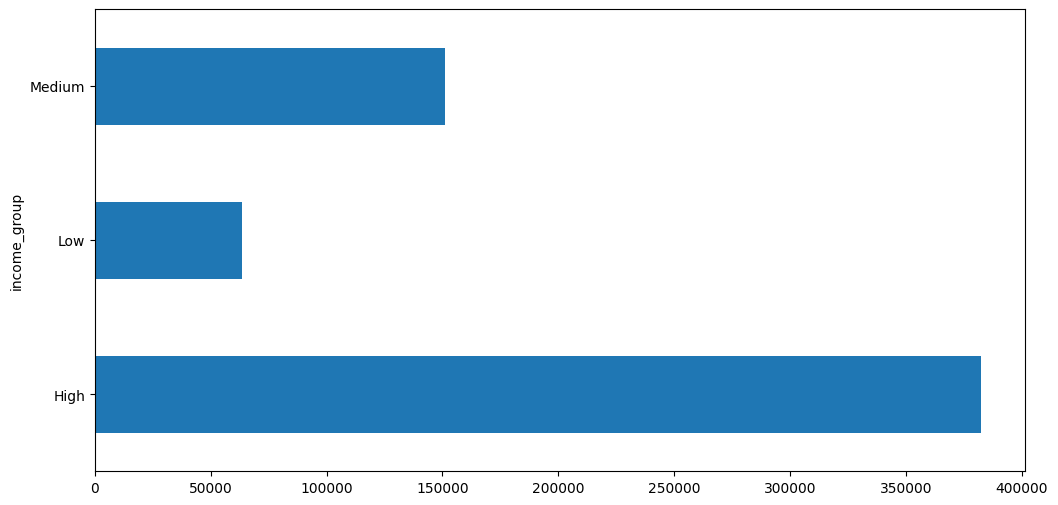

In [ ]:
# Find out whether there is any relation between 'income_group' and 'annual_income'
plt.figure(figsize=(12,6))
train.groupby('income_group')['annual_income'].mean().plot(kind='barh')
plt.show()


In [ ]:
# find median income of different income groups
train.groupby('income_group')['annual_income'].median()

,annual_income
income_group,
High,303940.305
Low,61105.430
Medium,143491.055


In [ ]:
# replace missing values in annual_income column according to their respective income groups
train['annual_income'] = train['annual_income'].fillna(train.groupby('income_group')['annual_income'].transform('median'))


In [ ]:
# since logically we cant assume loan type fill the missing values with other
train['loan_type'] = train['loan_type'].fillna('other')

In [ ]:
# find unique value in category of intrest column
train['category_of_interest'].value_counts()

,count
category_of_interest,
Low,15026
High,9424


<Axes: ylabel='category_of_interest'>

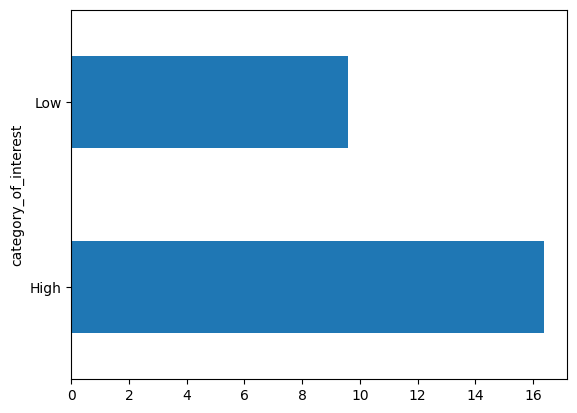

In [ ]:
# Find out whether there is any relation between 'category_of_interest' and 'interest_rate'
# plot a graph to find out whether there is a cutoff
train.groupby('category_of_interest')['interest_rate'].mean().plot(kind='barh')

<Axes: xlabel='interest_rate', ylabel='Count'>

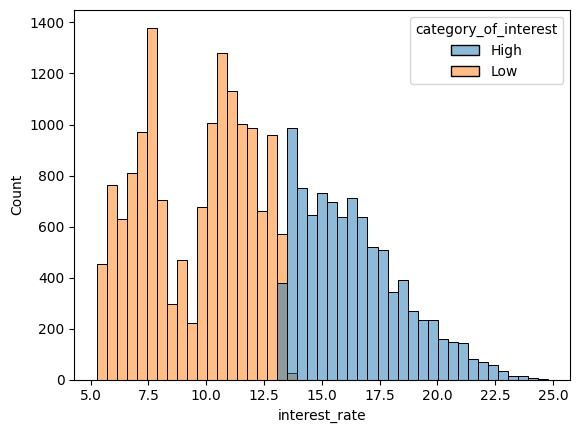

In [ ]:
sns.histplot(x='interest_rate', data=train, hue = 'category_of_interest')

In [ ]:
# find relationship between category of interest and interest rate
train.groupby('category_of_interest')['interest_rate'].mean()

,interest_rate
category_of_interest,
High,16.364998
Low,9.581623


In [ ]:
# fill interest rate according to category of interest
train['interest_rate'] = train['interest_rate'].fillna(train.groupby('category_of_interest')['interest_rate'].transform('mean'))


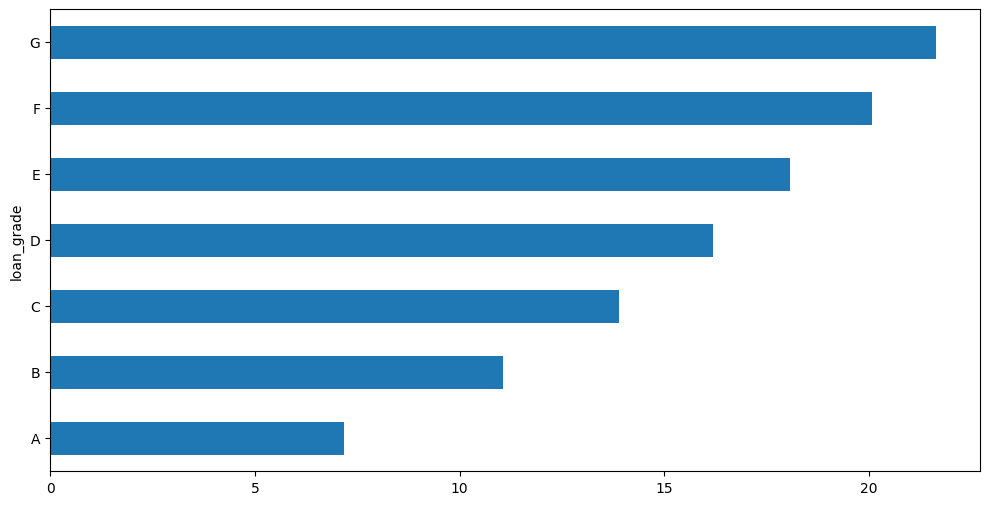

In [ ]:
# find relationship between interest rate and loan grade
plt.figure(figsize=(12,6))
train.groupby('loan_grade')['interest_rate'].mean().plot(kind='barh')
plt.show()

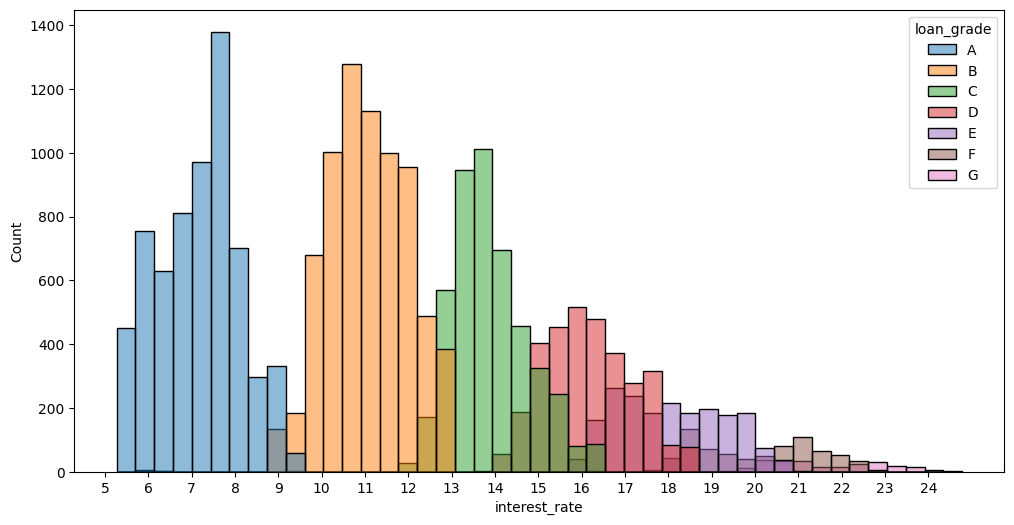

In [ ]:
# find relationship between interest rate and loan grade
plt.figure(figsize=(12,6))
sns.histplot(x='interest_rate', data=train, hue = 'loan_grade', hue_order=['A','B','C','D','E','F','G'])
plt.xticks(np.arange(5,25,1))
plt.show()

In [ ]:
# find relationship between loan grade and interest rate
train.groupby('loan_grade')['interest_rate'].mean()

,interest_rate
loan_grade,
A,7.166655
B,11.072316
C,13.890651
D,16.184677
E,18.064454
F,20.069784
G,21.633623


From above data explorations the following inferences can be drawn

Grade - interest rate:

A < 9

A < B < 12.5

B < C < 14.5

C < D < 17.5

D < E < 20.5

E < F < 22.5

F < G

In [ ]:
# replace missing values in loan_grade column according to the corresponding interest rate
train['loan_grade'] = train['loan_grade'].fillna(train.groupby('interest_rate')['loan_grade'].transform('first'))


So what does the method .transform('first') return?

It returns a series / dataframe with the same shape as the source group chunk, in which all values in every individual column are replaced with the first non-NaN value in this column, or with NaN if there is none.

In [ ]:
train['loan_grade'].value_counts()

,count
loan_grade,
B,7255
A,6397
C,4625
D,3231
E,1961
F,743
G,238


<Axes: xlabel='emi_amount', ylabel='loan_dsbursement_amount'>

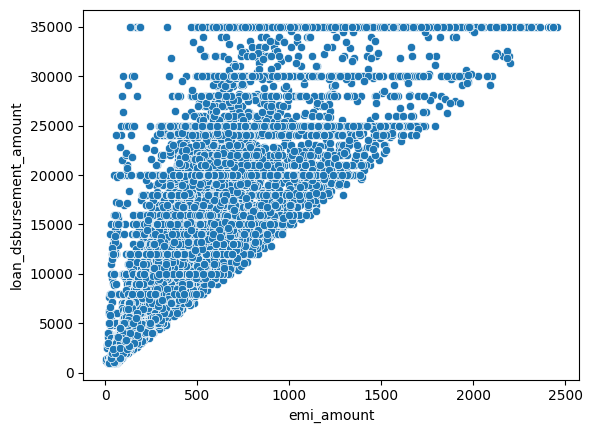

In [ ]:
# find out if there is any relationship  between emi_amount and loan_dsbursement_amount
sns.scatterplot(x='emi_amount', y='loan_dsbursement_amount', data=train)

There seems to be a clear linear relation between emi_amount and loan_disbursement amount. So to handle missing values in loan_disbursement amount use emi_amount column

Also according to mathematical principles emi is cleraly derived from principal(loan_disbursement amount), interest rate and tenor. Hence we are going to use these features to impute missing values in Loan_dsbursement column

### **Use KNNImputer**

How Does KNNImputer Work?

The KNNImputer works by finding the k-nearest neighbors (based on a specified distance metric) for the data points with missing values. It then imputes the missing values using the mean or median (depending on the specified strategy) of the neighboring data points. The key advantage of this approach is that it preserves the relationships between features, which can lead to better model performance.

In [ ]:
# create a new dataframe consisting of foll columns from train dataset: loan_dsbursement, loan_time_period, interest_rate, emi
new_train = train[['loan_dsbursement_amount','loan_time_period','interest_rate','emi_amount']]
new_train.head()

,loan_dsbursement_amount,loan_time_period,interest_rate,emi_amount
0,1200.0,36 months,15.47,41.95
1,9950.0,60 months,13.30,201.13
2,20000.0,36 months,18.26,853.55
3,6000.0,60 months,10.26,116.15
4,3500.0,48 months,5.79,79.61


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Remove months from loan_time_period column
new_train['loan_time_period'] = new_train['loan_time_period'].str.replace(' months', '')
# convert loan_time_period to integer
new_train['loan_time_period'] = new_train['loan_time_period'].astype(int)

In [ ]:
# find missing values in new_train dataset
new_train.isnull().sum()

,0
loan_dsbursement_amount,856
loan_time_period,0
interest_rate,0
emi_amount,0


In [ ]:
# now handle the missing values using KNNImputer from sklearn
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
new_train_imputed = imputer.fit_transform(new_train)


In [ ]:
# create a new dataframe from the imputer results
new_df = pd.DataFrame(new_train_imputed)
new_df

,0,1,2,3
0,1200.0,36.0,15.47,41.95
1,9950.0,60.0,13.30,201.13
2,20000.0,36.0,18.26,853.55
3,6000.0,60.0,10.26,116.15
4,3500.0,48.0,5.79,79.61
...,...,...,...,...
24445,12000.0,24.0,13.72,689.22
24446,10000.0,36.0,12.04,330.76
24447,8000.0,24.0,16.80,427.18
24448,3300.0,36.0,14.99,113.84


In [ ]:
# check for missing values
new_df.isnull().sum()

,0
0,0
1,0
2,0
3,0


In [ ]:
# use the new_df column[0] to replace loan_dsbursement column in train dataset
train['loan_dsbursement_amount'] = new_df[0]


In [ ]:
# Analyse and find whether there are any missing values
train.isnull().sum()

,0
customer_id,0
year_of_loan,0
income_group,0
annual_income,0
loan_dsbursement_amount,0
loan_time_period,0
loan_application_category,0
loan_type,0
category_of_interest,0
interest_rate,0


### Imputation steps are over. Now move on to type convertion

### **Step 5:** Data Transformation

In [ ]:
# find datatypes of columns
train.dtypes

,0
customer_id,object
year_of_loan,int64
income_group,object
annual_income,float64
loan_dsbursement_amount,float64
loan_time_period,object
loan_application_category,object
loan_type,object
category_of_interest,object
interest_rate,float64


In [ ]:
# Remove CSID from customer_id column and covert it to integer
train['customer_id'] = train['customer_id'].str.replace('CSID_', '')
train['customer_id'] = train['customer_id'].astype(int)

In [ ]:
# Remove months from loan_time_period column and covert it to integer
train['loan_time_period'] = train['loan_time_period'].str.replace(' months', '')
train['loan_time_period'] = train['loan_time_period'].astype(int)

In [ ]:
# use label encoding to convert to ordinal datatypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Create a copy of the dataset to preserve the original
train_encoded = train.copy()

for col in train_encoded.select_dtypes(include='object'):
    train_encoded[col] = le.fit_transform(train_encoded[col])

# Display the transformed dataset
print(train_encoded.head())

   customer_id  year_of_loan  income_group  annual_income  \
0       543704          2016             1       47836.70   
1       785937          2019             1       32656.53   
2       854712          2019             1      103760.56   
3       604825          2017             1       68338.13   
4       715030          2017             2      166065.52   

   loan_dsbursement_amount  loan_time_period  loan_application_category  \
0                   1200.0                36                          0   
1                   9950.0                60                          1   
2                  20000.0                36                          0   
3                   6000.0                60                          1   
4                   3500.0                48                          0   

   loan_type  category_of_interest  interest_rate  loan_grade  anonymous_X1  \
0          9                     0          15.47           3         15.26   
1          2            

In [ ]:
train_encoded.dtypes

,0
customer_id,int64
year_of_loan,int64
income_group,int64
annual_income,float64
loan_dsbursement_amount,float64
loan_time_period,int64
loan_application_category,int64
loan_type,int64
category_of_interest,int64
interest_rate,float64


###**Step 6:** Feature Engineering
Analyse relationship of dependent to independent variables, observe colinearity and select best features for target loan-status column

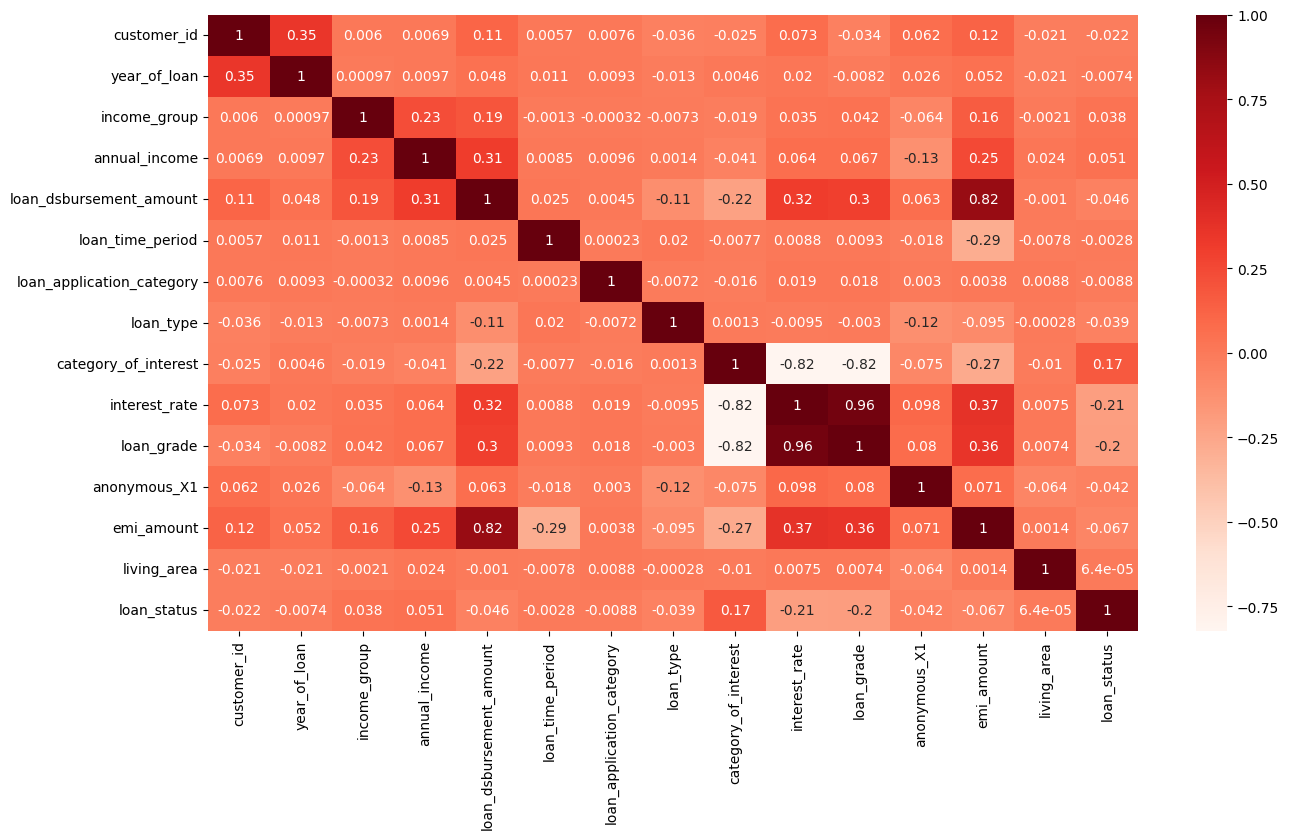

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(15,8))
cor = train_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:
# find and list best corelated features to target
cor['loan_status'].sort_values(ascending=False)

,loan_status
loan_status,1.000000
category_of_interest,0.168653
annual_income,0.051494
income_group,0.037912
living_area,0.000064
loan_time_period,-0.002786
year_of_loan,-0.007447
loan_application_category,-0.008769
customer_id,-0.022483
loan_type,-0.039273


From above analysis follwing features can be considered:

1. category of interest 2. annual income 3. income_group (in positive direction)

4. interest rate 5. loan grade 6. emi_amt 7. loan_disbursement_amt (in negative direction)

<Axes: xlabel='anonymous_X1', ylabel='emi_amount'>

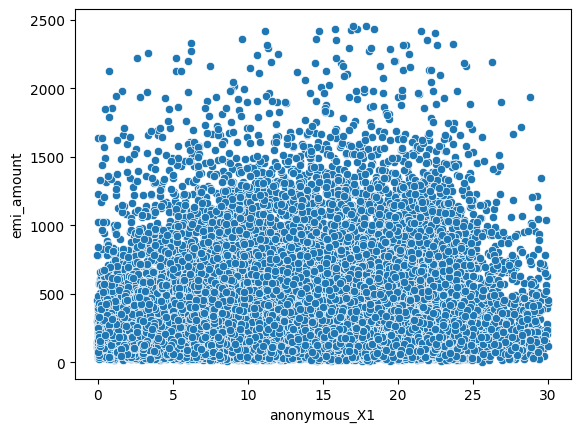

In [ ]:
# find if there is any relationship between anonymous_X1 and emi_amount
sns.scatterplot(x='anonymous_X1', y='emi_amount', data=train)

But some features are colinear hence consider only one feature. For eg: annual_income and income_grade are colinear, since annual_income has higher correlation score to target it is slected. Similarly following are features are selected for final model building:

Feature_1 : interest_rate

Feature_2 : annual_income

Feature_3 : emi_amount

Feature_4 : loan_dsbursement_amount

Feature_5 : loan_grade

Feature_6 : anonymous_X1

Feature_7 : loan_application_category - since often banks classify collaterals as safe bets(althoough data at hand dint support this)

Also add customer_id, although it doesnt have any significant corelation its still used as primary indicator

In [ ]:
# build features and target dataset
X = train_encoded[['customer_id','interest_rate','annual_income','emi_amount','loan_dsbursement_amount','loan_grade','anonymous_X1','loan_application_category']]
y = train['loan_status']

In [ ]:
X.head(5) # features

,customer_id,interest_rate,annual_income,emi_amount,loan_dsbursement_amount,loan_grade,anonymous_X1,loan_application_category
0,543704,15.47,47836.70,41.95,1200.0,3,15.26,0
1,785937,13.30,32656.53,201.13,9950.0,2,24.36,1
2,854712,18.26,103760.56,853.55,20000.0,4,15.88,0
3,604825,10.26,68338.13,116.15,6000.0,1,17.93,1
4,715030,5.79,166065.52,79.61,3500.0,0,6.16,0


In [ ]:
y.head(5) # target

,loan_status
0,Good Loan
1,Bad Loan
2,Good Loan
3,Good Loan
4,Good Loan


### **Step 7:** Standardizing or Scaling

In [ ]:
# using standard scaler normalize or standardize the input/feature values for better regression results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

### **Step 8:** Model Building

In [ ]:
# split dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)

In [ ]:
# build logistic regression model on train set
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predict values using test set
y_pred = reg.predict(X_test)

###**Step 9:** Model Evaluation

In [ ]:
# analyze performance using confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("F1 score: ", f1_score(y_test,y_pred, pos_label='Good Loan'))

Confusion Matrix: 
 [[   0  692]
 [   1 4197]]
Accuracy score:  0.8582822085889571
F1 score:  0.9237372069990095


###**Step 10:** Conclusion
 The model metrics shows an accuracy of 86% But since this is a financial data project evaluation should be more sensitive to predicting bad loans i.e minority cases. Hence F1 score is used to predict model`s sensitivity, the achieved F1 score is 92.4% which shows a high performing model that works well to minority cases and avoid type 1 & 2 errors to a greater extent as well.

## Now repeat the process for Test dataset, predict using ML model built and compare with actual output since test dataset doesnt have target column

In [ ]:
# check for Nan values
test.isna().sum()

,0
customer_id,0
year_of_loan,0
income_group,0
annual_income,178
loan_dsbursement_amount,178
loan_time_period,0
loan_application_category,0
loan_type,265
category_of_interest,0
interest_rate,16


In [ ]:
# since logically we cant assume loan type fill the missing values with other
test['loan_type'] = test['loan_type'].fillna('other')

# replace missing values in annual_income column according to their respective income groups
test['annual_income'] = test['annual_income'].fillna(test.groupby('income_group')['annual_income'].transform('median'))

# fill interest rate according to category of interest
test['interest_rate'] = test['interest_rate'].fillna(test.groupby('category_of_interest')['interest_rate'].transform('mean'))

# replace missing values in loan_grade column according to the corresponding interest rate
test['loan_grade'] = test['loan_grade'].fillna(test.groupby('interest_rate')['loan_grade'].transform('first'))



In [ ]:
# create a new dataframe consisting of foll columns from train dataset: loan_dsbursement, loan_time_period, interest_rate, emi
new_test = test[['loan_dsbursement_amount','loan_time_period','interest_rate','emi_amount']]

# Remove months from loan_time_period column and convert to int datatype
new_test['loan_time_period'] = new_test['loan_time_period'].str.replace(' months', '')
new_test['loan_time_period'] = new_test['loan_time_period'].astype(int)

new_test_imputed = imputer.transform(new_test)

In [ ]:
# create a new dataframe from the imputer results
new_test_df = pd.DataFrame(new_train_imputed)

# use the new_df column[0] to replace loan_dsbursement column in train dataset
test['loan_dsbursement_amount'] = new_test_df[0]


In [ ]:
# check missing value count
test.isna().sum()

,0
customer_id,0
year_of_loan,0
income_group,0
annual_income,0
loan_dsbursement_amount,0
loan_time_period,0
loan_application_category,0
loan_type,0
category_of_interest,0
interest_rate,0


In [ ]:
#check datatypes of test dataframe
test.dtypes

,0
customer_id,object
year_of_loan,int64
income_group,object
annual_income,float64
loan_dsbursement_amount,float64
loan_time_period,object
loan_application_category,object
loan_type,object
category_of_interest,object
interest_rate,float64


In [ ]:
# transform data i.e change datatypes of column to numerical
test['customer_id'] = test['customer_id'].str.replace('CSID_', '')
test['customer_id'] = test['customer_id'].astype(int)


In [ ]:
# Create a copy of the dataset to preserve the original
train_encoded = train.iloc[:, 1:-1]
test_encoded = test.copy()

for col in train_encoded.select_dtypes(include='object'):
    # this step is included because in original fir_transform target was included hence we are reconfiguring without target
    train_encoded[col] = le.fit_transform(train_encoded[col])
    test_encoded[col] = le.transform(test_encoded[col])

# Display the transformed dataset
print(test_encoded.head())

   customer_id  year_of_loan  income_group  annual_income  \
0       879508          2018             1      119842.02   
1       931391          2018             1       82832.93   
2      1000579          2019             1       54969.70   
3      1002502          2019             1       41939.71   
4      1010293          2017             2      135288.47   

   loan_dsbursement_amount loan_time_period  loan_application_category  \
0                   1200.0        60 months                          2   
1                   9950.0        24 months                          2   
2                  20000.0        24 months                          1   
3                   6000.0        36 months                          3   
4                   3500.0        48 months                          0   

   loan_type  category_of_interest  interest_rate  loan_grade  anonymous_X1  \
0          2                     0          22.67           5          9.66   
1          2                  

In [ ]:
# features
Xt = test_encoded[['customer_id','interest_rate','annual_income','emi_amount','loan_dsbursement_amount','loan_grade','anonymous_X1','loan_application_category']]


In [ ]:
Xt_scaled = scaler.transform(Xt) # scale features

In [ ]:
# predict values on test set
yt_pred = reg.predict(Xt)

In [ ]:
yt_pred.size

5550

In [ ]:
# load expected output file and check accuracy and f1 score
output = pd.read_csv("expected_output.csv")
output.head()

,customer_id,loan_status
0,CSID_879508,Good Loan
1,CSID_931391,Good Loan
2,CSID_1000579,Good Loan
3,CSID_1002502,Good Loan
4,CSID_1010293,Good Loan


In [ ]:
# add a column for actual output but in label encoded form
output['loan_status_pred'] = yt_pred
output.head()

,customer_id,loan_status,loan_status_pred
0,CSID_879508,Good Loan,Good Loan
1,CSID_931391,Good Loan,Good Loan
2,CSID_1000579,Good Loan,Good Loan
3,CSID_1002502,Good Loan,Good Loan
4,CSID_1010293,Good Loan,Good Loan


In [ ]:
y_test = output['loan_status']
y_pred = yt_pred

In [ ]:
# analyze performance using confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("F1 score: ", f1_score(y_test,y_pred, pos_label='Good Loan'))

Confusion Matrix: 
 [[   0  800]
 [   0 4750]]
Accuracy score:  0.8558558558558559
F1 score:  0.9223300970873787


## **Conclusion:**

### Since the Logistic regression Classifier built has accuracy of 86% and F1 score of 92% we conclude by selecting this model as best fit ML model solution for the bank loan prediction process

### **Future Work:**

The dataset can be experimented further with other classification models such as Random Forest, XGBoost etc., We can also use ensemble learning techniques to improve model efficiency. Also can explore creating new features from existing data, such as income-to-loan ratio or credit history score adjustments, to capture more predictive power.

### Machine Learning Solution Designed and Presented by **Janani Lakshmi Narayanan**